# Configuration

In [18]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1010-Group-Project'
EXPERIMENT_NAME = 'ReviewText_Lemma_Bert2 (Random Forest)'
FILE_NAME = '01_ML1010_GP_RF_Bert2'
LOAD_FROM_EXP = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [19]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 15:39
Hello sir. An early morning I see.



# Setup Runtime Environment

In [20]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import importlib
import cw_df_metric_utils as cwutils
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

In [22]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

# Load Data

In [23]:
#axis_labels=[1,2,3,4,5]
axis_labels=[0,1]
classifier = RandomForestClassifier()
ANALSYSIS_COL = 'reviewText_lemma_bert'
UNIQUE_COL = 'uuid'
TARGET_COL = 'overall_posneg'

In [24]:
if LOAD_FROM_EXP:
    #start from saved state
    myExp = jarvis.loadExperiment(FILE_NAME)
    myExp.display()

else:
    #start from source file and regenerate
    testDf = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_NL_ReviewText_All(new).pkl.gz")
    print(testDf.info())
    
    
    testDfBert = cwutils.getBertEncodeFrame(df=testDf,
                                            bertColumn=ANALSYSIS_COL,
                                            uniqueColumn=UNIQUE_COL,
                                            otherColumns=[TARGET_COL]
                                            )
    
    print(f'Encoded frame shape: {testDfBert.shape}')
    
    myExp = DataExperiment.DataExperiment(projectName=PROJECT_NAME,
                                          experimentName=EXPERIMENT_NAME,
                                          origData=testDfBert,
                                          uniqueColumn=UNIQUE_COL,
                                          targetColumn=TARGET_COL,
                                          classifier=classifier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63413 entries, 0 to 63412
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   uuid                                    63413 non-null  object 
 1   reviewText                              63413 non-null  object 
 2   overall                                 63413 non-null  float64
 3   reviewText_lemma                        63413 non-null  object 
 4   reviewText_nouns                        63413 non-null  object 
 5   reviewText_adjectives                   63413 non-null  object 
 6   reviewText_verbs                        63413 non-null  object 
 7   reviewText_nav                          63413 non-null  object 
 8   reviewText_lemma_tb_pol                 63310 non-null  float64
 9   reviewText_lemma_tb_subj                63310 non-null  float64
 10  reviewText_lemma_tb_tokens              63310 non-null  fl

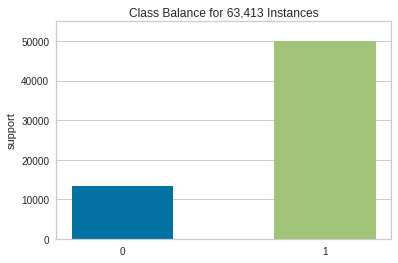

,overall_posneg,ttlCol
0,0,13440
1,1,49973


In [25]:
myExp.dataPackage.displayClassBalance(verbose=True)

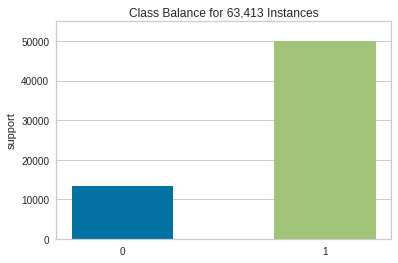

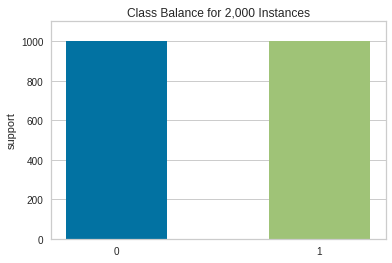

,overall_posneg,ttlCol
0,0,1000
1,1,1000


In [26]:
myExp.dataPackage.classBalanceUndersample(sampleSize=1000)

In [27]:
#Options:
#stratifyColumn=?
#train_size=? (percentage or absolute)
#random_state=?
#shuffle=?

myExp.dataPackage.splitTrainTest()

Completed train/test split (train_size = 0.8):
---> Original data size: 2000
---> Training data size: 1600
---> Testing data size: 400
---> Stratified on column: overall_posneg


In [28]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert2 (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall_posneg
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [29]:
%%time
myExp.createBaseModel()

Base Model Stats:
Accuracy: 0.82
Precision: 0.82
Recalll: 0.82
F1 Score: 0.82
Cohen kappa:: 0.64
CPU times: user 2.08 s, sys: 3.87 ms, total: 2.08 s
Wall time: 2.08 s


In [ ]:
#myExp.showBaseLimeGlobalImportance()
#myExp.showBaseLimeLocalImportance()

_ = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.002,
                                            startValue=0,
                                            increment=0.001,
                                            upperValue=0.03)

In [ ]:
%%time
#myExp.createFinalModel(impFeatures=?)
myExp.createFinalModel(featureImportanceThreshold=0.002)

In [ ]:
%%time
myExp.createBaseModelLearningCurve()

In [ ]:
%%time
myExp.createFinalModelLearningCurve()

In [ ]:
myExp.showBaseModelReport(axisLabels=axis_labels,
                          upperValue=0.025)

In [ ]:
myExp.showFinalModelReport(axisLabels=axis_labels,
                           startValue=0,
                           increment=0.001,
                           upperValue=0.03)

In [ ]:
myExp.display()

#  Save Experiment

In [ ]:
jarvis.saveExperiment(myExp, FILE_NAME)

#  Scratchpad